## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#Conclusion)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv',sep=',')
df.head(4)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0


b. Use the below cell to find the number of rows in the dataset.

In [4]:
len(df)

294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
len(df.query('converted == 1'))/len(df)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
len(df.query('group == "treatment" and landing_page != "new_page"'))+len(df.query('group != "treatment" and landing_page == "new_page"'))

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().any() # there is no any missing value inside the dataset

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# subset
temp_1 = df[(df['group']=='treatment') & (df['landing_page']=='new_page')]
temp_2 = df[(df['group']=='control') & (df['landing_page']=='old_page')]
# concat
frame = [temp_1, temp_2]
df2 = pd.concat(frame)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2_dup = df2[df2.user_id.duplicated(keep= False)]
df2_dup

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
# row info
df2_dup['group'].iloc[0],df2_dup['landing_page'].iloc[0],df2_dup['converted'].iloc[0]

('treatment', 'new_page', 0)

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(subset='user_id', keep="last", inplace=True)
# len(df2)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
(df2.groupby('converted')['converted'].count().iloc[1])/len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
prob_cont_conv = len(df2[(df2['converted']==1)&(df2['group']=='control')])/len(df2[df2['group']=='control'])
prob_cont_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
prob_trea_conv = len(df2[(df2['converted']==1)&(df2['group']=='treatment')])/len(df2[df2['group']=='treatment'])
prob_trea_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
len(df2[df2['landing_page']=='new_page'])/len(df2)

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

>Whether the group is in treatment or control, it seems the probability of convert rate of them remain nearly as same.
Base on those probabilities above, I think there is no obvious evidence to support that if the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>null hypothesis:
$$ H_0: p_{new} - p_{old} <= 0 $$

>alternative hypothesis:
$$ H_1: p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
Pnew = df2['converted'].mean()
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
Pold = df2['converted'].mean()
Pold

0.11959708724499628

c. What is $n_{new}$?

In [21]:
Nnew = len(df2[df2['landing_page']=='new_page'])
Nnew

145310

d. What is $n_{old}$?

In [22]:
Nold = len(df2[df2['landing_page']=='old_page'])
Nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.binomial(1,Pnew,Nnew)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.binomial(1,Pold,Nold)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
obs_diff = new_page_converted.mean()-old_page_converted.mean()
obs_diff

-7.0974736301340768e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [26]:
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    new_page_converted = np.random.binomial(1,Pnew,Nnew)
    old_page_converted = np.random.binomial(1,Pold,Nold)
    p_diff =  new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)
# mean of p_diffs under null 
p_diffs_m = np.array(p_diffs).mean()

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

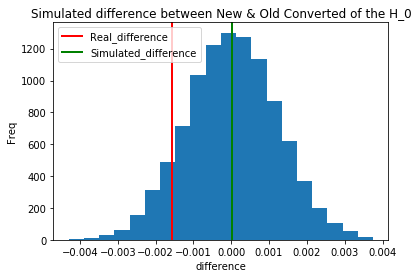

In [27]:
# real pnew and real pold not under null
rPnew = df2[df2['landing_page']=='new_page']['converted'].mean()
rPold = df2[df2['landing_page']=='old_page']['converted'].mean()
# different not under null
rp_diffs = rPnew - rPold
# plot hist
plt.hist(p_diffs, bins=20)
plt.title('Simulated difference between New & Old Converted of the H_0')
plt.xlabel('difference')
plt.ylabel('Freq')
plt.axvline(x=rp_diffs, color='r', linestyle='solid', linewidth=2, label="Real_difference")
plt.axvline(x=p_diffs_m, color='g', linestyle='solid', linewidth=2, label="Simulated_difference")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
greater = []
for i in p_diffs:
    if i > rp_diffs:
        greater.append(i)
pro_diffs_greater_real = len(greater)/len(p_diffs)
pro_diffs_greater_real

0.9056

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>If the sample lies in the H0 then we would expect the proportion greater than the Type I error rate 5% else we reject the null hypothesis.
We result that greater than nearly 90% ( >5% )of the population in the simulated sample lies above the real difference which doesn't support that the new page do significantly better than the old page.
The porportion that return above in part.j is p_value.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm # fail to import in local notebook, haven't figure out yet

convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])

print("convert_old:", convert_old,", convert_new:",convert_new,"\nNold:", Nold,", Nnew:", Nnew)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old: 17489 , convert_new: 17264 
Nold: 145274 , Nnew: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[Nnew, Nold], alternative='larger')
print("z-score:", z_score,",p-value:", p_value)

z-score: -1.31092419842 ,p-value: 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>z-score is the number of standard deviations from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.([ref](http://www.statisticshowto.com/probability-and-statistics/z-score/))   
It seems the differences between the lines in the histogram above is -1.31 standard deviations. 
The p-value we finnally got is nearly 90% (same as the hist's outcome above) which is the probability that this result is enough to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>Since each row is either a conversion or no conversion, we can use Logistic regression since it is the technique that can predict a binary outcome.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# copy a new df to this part
df_reg = df2.copy()

In [32]:
# create intercept col and ab_page col
df_reg['intercept'] = pd.Series(np.zeros(len(df_reg)), index=df_reg.index)
df_reg['ab_page'] = pd.Series(np.zeros(len(df_reg)), index=df_reg.index)
change = df_reg[df_reg['group']=='treatment'].index

# change values
df_reg.set_value(index=change, col='ab_page', value=1)
df_reg.set_value(index=df_reg.index, col='intercept', value=1)
# change datatype
df_reg[['intercept', 'ab_page']] = df_reg[['intercept', 'ab_page']].astype(int)

# Move "converted" to RHS
df_reg = df_reg[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]
# Check everything  has worked
df_reg[df_reg['group']=='treatment'].head()

,user_id,timestamp,group,landing_page,ab_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
logit = sm.Logit(df_reg['converted'], df_reg[['ab_page', 'intercept']])
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Sep 2018   Pseudo R-squ.:               8.077e-06
Time:                        13:30:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>The p-value of ab_page is 0.190 which differ from PartII ztest. The reason that why they're differ fom each other since the ztest above conducting an "one-side" test, but in the regression model it seems it is dealing with "two-side" test.([See the reference](http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis#Hypothesis_Tests_in_Simple_Linear_Regression)) 
But according to new p-value, it still fails to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>When we conduct the regression analysis we want the feature causes large impacts to the result, terms with small impact are usually not affected and should be left for the intercept.  
But,in this case, adding a couple of won't casue too much. Think about feature like the  page viewing time might be interesting feature to put in. The longer a person spend on a page the more he/she is likely to get used to it and doesn't want to change.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [35]:
# load dataset
df_co = pd.read_csv('countries.csv')
df_co.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [36]:
# create dummy col
df_dum = pd.get_dummies(data=df_co, columns=['country'])
df_reg2 = df_dum.merge(df_reg, on='user_id')# merge 2 df

# sort col
df_reg2 = df_reg2[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'country_CA', 'country_UK', 'country_US', 'intercept', 'converted']]
# change data type
df_reg2[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']] =\
df_reg2[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']].astype(int)

df_reg2.head(4)

,user_id,timestamp,group,landing_page,ab_page,country_CA,country_UK,country_US,intercept,converted
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,0,0,1,1,0
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0


In [37]:
logit_co = sm.Logit(df_reg2['converted'], df_reg2[['country_UK', 'country_US', 'intercept']])
result_co = logit_co.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [38]:
result_co.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Sep 2018   Pseudo R-squ.:               1.521e-05
Time:                        13:31:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

It seems that country have some influences on conversion rate, but not enough to be satistically significant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
df_reg2['US_ind_ab_page'] = df_reg2['country_US']*df_reg2['ab_page']
df_reg2['UK_ind_ab_page'] = df_reg2['country_UK']*df_reg2['ab_page']
logit_co_2 = sm.Logit(df_reg2['converted'], df_reg2[['intercept', 'ab_page', 'country_US', 'country_UK', 'US_ind_ab_page', 'UK_ind_ab_page']])
result_co_2 = logit_co_2.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [40]:
result_co_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Sep 2018   Pseudo R-squ.:               3.482e-05
Time:                        13:31:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page           -0.0674      0.052     -1.297      0.195      -0.169       0.034
country_US         0.0175      0.038      0.465      0.642      -0.056       0.091
country_UK         0.0118      0.040      0.296      0.767      -0.066       0.090
US_ind_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ind_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==================================================================================
"""

Adding everything together above, it seems that the p-values for all featues has increased.    
The z-score for the intercept is large though which is interesting.

<a id='Conclusion'></a>
## Conclusion   
We found there is difference between the converted rates of new and old pages,but there is just not enough evidence to reject the null hypothesis. Seeing the hist graph shown above, it reveals that the new page does worse than the old one. It also seems that this was not dependent on countries with converted rates being nearly the same in the UK as in the US.   

The test were good as well, users had a approximate 50% chance to take each of the new and old page,  
and the size of the first dataframe is sufficiently big such that collecting data is likely not a good use of resources.

I would give my suggestion that the company should spend their money to improve the website before conducting the test again. Maybe after that, they will find some reasons why the page perform unwell.

In [69]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0